<a href="https://colab.research.google.com/github/Paulin178/Machine-Learning/blob/main/ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exactitude du modèle : 0.9992141602044441
Matrice de confusion :
 [[1270834      70]
 [    930     690]]


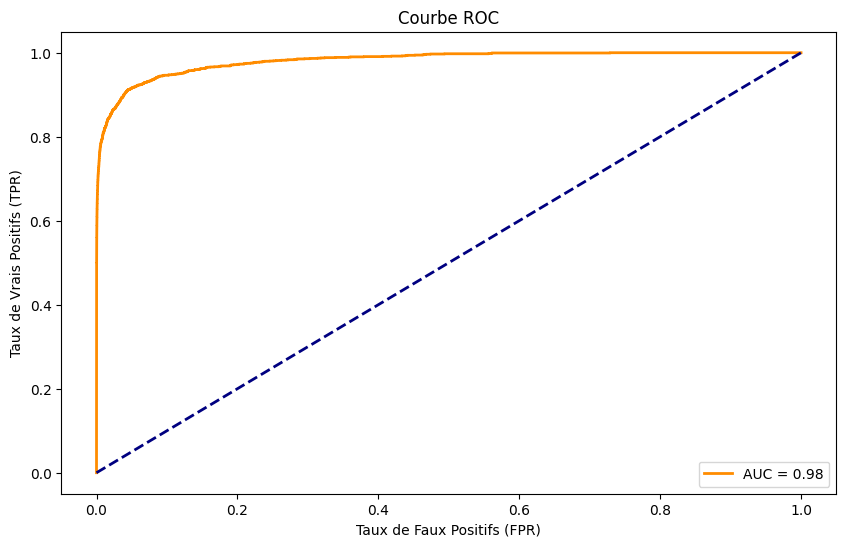

['model.pkl']

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from joblib import dump
import seaborn as sns
import matplotlib.pyplot as plt

# Chargement des données à partir du fichier CSV
data = pd.read_csv('clear_data.csv')

# Sélection des colonnes pertinentes
selected_columns = ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
                    'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud', 'isFraud']
data = data[selected_columns]

# Gestion des valeurs manquantes (s'il y en a)
data.dropna(inplace=True)

# Encodage des variables catégorielles avec LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['type', 'nameOrig', 'nameDest']
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Séparation des caractéristiques (X) et de la variable cible (y)
X = data.drop('isFraud', axis=1)
y = data['isFraud']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mise à l'échelle des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Création d'un modèle de régression logistique avec un solveur différent et plus d'itérations
model = LogisticRegression(max_iter=1000, solver='liblinear')

# Entraînement du modèle sur l'ensemble d'entraînement mis à l'échelle
model.fit(X_train_scaled, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test_scaled)

# Calcul de l'exactitude (accuracy) du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Exactitude du modèle :", accuracy)

# Matrice de confusion pour évaluer les prédictions
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :\n", conf_matrix)

# Prédictions de probabilité sur l'ensemble de test
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Calcul des taux de faux positifs (FPR) et des taux de vrais positifs (TPR)
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Calcul de l'AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

# Sauvegarde du modèle
dump(model, 'model.pkl')
